# Clustering Hygiene Product Preferences at U-ACCESS Using Unsupervised Learning
This report explores the analysis of hygiene product requests from 300 U-ACCESS students using unsupervised learning techniques. By applying K-means clustering, DBSCAN, and PCA, distinct product preference patterns were identified, leading to actionable insights for optimizing inventory management and distribution strategies.

In [15]:
# Import data
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [50]:
# Load dataset
df = pd.read_csv('/Users/DELL/Desktop/Projects/U-ACCESS/Hygiene Product Fall 2024 - Shareable.csv')
# Rename the columns
df = df.rename(columns={
    'Student ID': 'student_id',
    'Toilet Paper / Laundry / Dish soap': 'toilet_paper_laundry_dish_soap',
    'Socks': 'socks',
    'Toothpaste, soap, chapstick': 'toothpaste_soap_chapstick',
    'Shampoo': 'shampoo',
    'Body Wash': 'body_wash',
    'Hand soap Hand Sanitzier, Lotion': 'hand_soap_hand_sanitizer_lotion',
    'Feminine Hygiene': 'feminine_hygiene',
    'Deodorant': 'deodorant'
})
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Create binary flags: 1 if the student requests the product, 0 otherwise
df['socks'] = df['socks'].apply(lambda x: 1 if isinstance(x, str) and 'socks' in x.lower() else 0)
df['Shampoo'] = df['Shampoo'].apply(lambda x: 1 if isinstance(x, str) and 'shampoo' in x.lower() else 0)
df['body_wash'] = df['body_wash'].apply(lambda x: 1 if isinstance(x, str) and 'body wash' in x.lower() else 0)
df['feminine_hygiene'] = df['feminine_hygiene'].apply(lambda x: 1 if isinstance(x, str) and 'feminine' in x.lower() else 0)
df['deodorant'] = df['deodorant'].apply(lambda x: 1 if isinstance(x, str) and 'deodorant' in x.lower() else 0)

# Create product matrices
product_matrix_1 = df['toilet_paper_laundry_dish_soap'].str.get_dummies(sep=';')
product_matrix_2 = df['toothpaste_soap_chapstick'].str.get_dummies(sep=';')
product_matrix_3 = df['hand_soap_hand_sanitizer_lotion'].str.get_dummies(sep=';')

# Select additional columns without splitting
additional_columns = df[['socks', 'Shampoo', 'body_wash', 'feminine_hygiene', 'deodorant']]

# Combine the product matrices and additional columns
product_data = pd.concat([product_matrix_1, product_matrix_2, product_matrix_3, additional_columns], axis=1)

# Standardize the data
scaler = StandardScaler()
product_data_scaled = scaler.fit_transform(product_data)


We would first use PCA to understand the structure of data and whether clusters are well-separated or irregularly shaped.

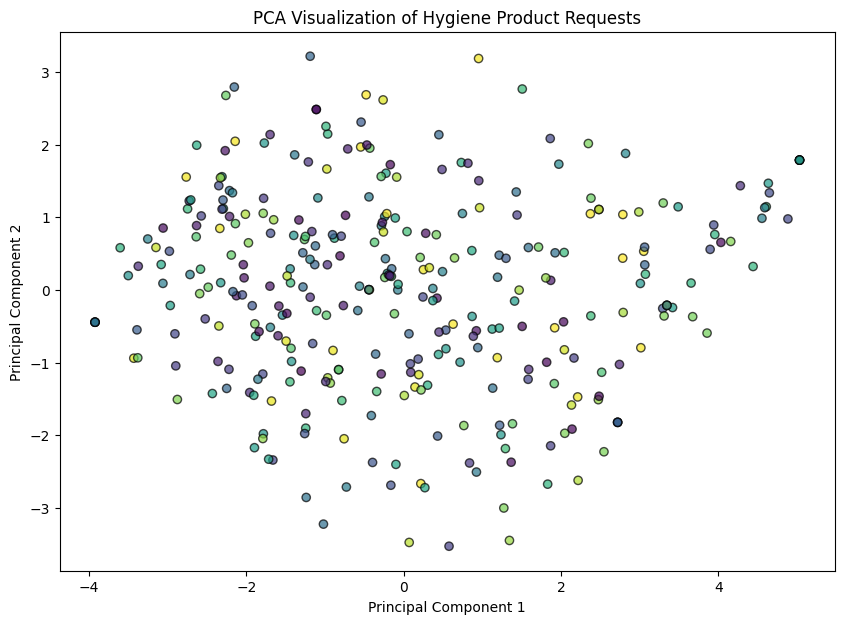

In [51]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(product_data_scaled)

# Generate random colors for each point
colors = np.random.rand(X_pca.shape[0])

# Visualize the PCA results with random colors
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7, edgecolor='k', cmap='viridis')
plt.title('PCA Visualization of Hygiene Product Requests')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Interpretation of the PCA graph
1. Spread across the graph:
- If the data is spread out across the graph, it suggests that there is a lot of variability in the data.
- This might mean that your respondents have diverse product preferences, and there isn't a clear, dominant pattern or group.
2. Overlapping points in different colors:
- Overlap in different colors indicates that the same data points (students) belong to different clusters.
- There may not be distinct groups in the data that can be easily identified.
  
Now, we would switch to DBSCAN first because DBSCAN does not require you to specify the number of clusters in advance. This is helpful because you're unsure about how many groups (clusters) your data might form.

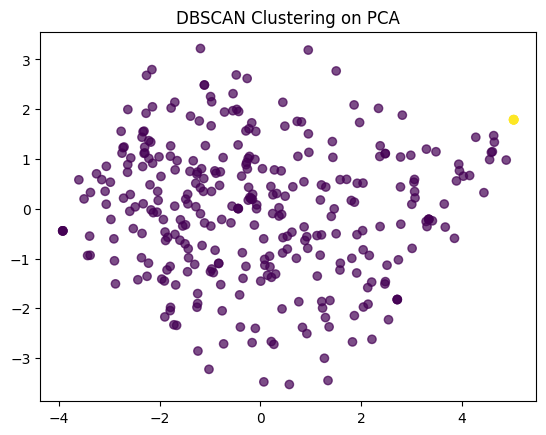

In [38]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(product_data_scaled)

# Plot the DBSCAN results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering on PCA')
plt.show()


In [39]:
dbscan_labels = dbscan.fit_predict(product_data_scaled)
print(dbscan_labels)


[-1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


**Label** -1: Points labeled as -1 are considered **noise points** (outliers), meaning they don't fit into any dense region.
Other labels (0, 1, 2, etc.): These represent the different **clusters** identified by DBSCAN.

In this output, it seems that most of the points are labeled as -1, which indicates that they are considered noise points by DBSCAN (outliers). This suggests that DBSCAN has not found any meaningful clusters in your dataset based on the current settings of the eps and min_samples parameters.

- -1 (Noise Points): Most of the points are labeled as -1, which means DBSCAN considers them outliers. This could happen if the density of the data is not sufficient to form clusters or if the eps parameter is too small (making the density threshold for forming a cluster too strict).

- 0 (Cluster): A few points (if any) are labeled 0, meaning they belong to the first identified cluster. It’s possible that the min_samples or eps values need to be adjusted to capture more meaningful clusters.

Because the output has so many points labeled as -1, I would like to count the specific number to decide whether I should continue to pursue DBSCAN or switch to another model. 

In [40]:
unique_labels = set(dbscan_labels)
print(f"Number of clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Noise points: {list(dbscan_labels).count(-1)}")


Number of clusters: 1
Noise points: 321


It seems like the number of noise points overwhelm number of cluster (1/321), which I believe changing to an alternative method is better than tuning the parameter.

We would switch to K-Means Clustering. 

# K-Means Clustering
The number of clusters (k) must be determined before running K-means, and techniques like the Elbow Method can be used to identify the optimal number of clusters by analyzing the variance explained for different values of k.

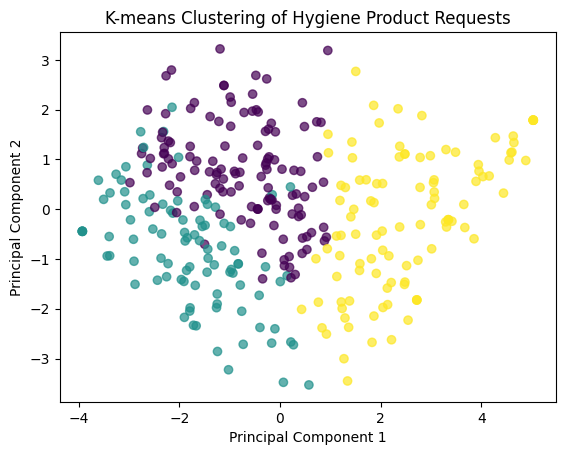

[1 2 0 1 2 0 0 1 0 0 1 0 0 0 2 1 1 2 2 1 1 2 0 0 0 0 2 0 1 0 1 1 2 2 0 2 2
 1 1 1 2 0 0 1 0 2 2 2 0 0 1 0 0 1 2 1 2 2 2 1 0 1 0 2 2 0 1 2 1 0 1 1 1 1
 0 2 2 0 0 1 1 1 1 2 0 2 1 1 2 1 2 0 0 0 1 2 0 1 0 2 0 0 0 2 0 2 2 1 1 1 2
 0 2 0 2 1 0 1 0 2 1 1 0 0 1 1 0 2 2 0 0 1 2 1 2 1 1 2 0 0 1 0 1 0 0 1 2 0
 1 2 1 0 1 1 0 0 1 0 0 1 2 0 2 1 1 1 2 0 2 2 0 0 1 0 0 0 0 2 2 2 2 0 0 2 0
 0 2 0 0 1 1 1 2 1 1 2 0 0 0 2 2 2 0 2 2 0 2 2 1 2 2 0 0 1 1 0 0 1 2 2 0 2
 2 1 0 0 1 1 0 0 2 2 0 2 2 0 0 0 1 0 2 1 1 1 0 0 2 0 1 0 2 2 0 0 0 0 1 2 2
 2 0 0 0 2 2 1 2 2 1 2 2 2 2 0 2 2 0 0 0 0 1 1 2 2 1 0 1 2 0 1 2 2 0 2 2 1
 0 1 0 1 1 0 0 0 2 2 0 1 2 0 0 0 0 2 2 0 0 2 1 0 0 0 1 0 2 1]
{np.int32(0): np.int64(127), np.int32(1): np.int64(94), np.int32(2): np.int64(105)}


In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit K-means with a chosen number of clusters (let's assume 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(product_data_scaled)

# Plot the results (use PCA or t-SNE if needed for visualization)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title('K-means Clustering of Hygiene Product Requests')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print the cluster labels for each point
print(kmeans_labels)
unique, counts = np.unique(kmeans_labels, return_counts=True)
cluster_distribution = dict(zip(unique, counts))
print(cluster_distribution)


## Interpretation: 

- Cluster 0 contains the highest number of students (127). This group could represent students with general or varied hygiene needs. They may not have strong preferences for a particular category of hygiene products

- Cluster 1 has the smallest number of students (94). This cluster has the fewest students, so the preferences here might be more unique or diverse compared to other clusters.

- Cluster 2 is somewhere in between (105 students). This is a middle-sized cluster that may represent students with different preferences compared to the others.


In [53]:
# Convert the result into a DataFrame for easier handling
product_data_scaled_df = pd.DataFrame(product_data_scaled, columns=product_data.columns)

# Add the cluster labels to the scaled data
product_data_scaled_df['Cluster'] = kmeans_labels

## Group by the 'Cluster' column and calculate the mean for each feature
cluster_summary = product_data_scaled_df.groupby('Cluster').mean()

# Print the summary for each cluster
print(cluster_summary)




         Dish-washing liquid (new client)  \
Cluster                                     
0                               -0.023824   
1                               -0.537085   
2                                0.509634   

         Dish-washing liquid refill (returning clients)  \
Cluster                                                   
0                                             -0.048555   
1                                             -0.450721   
2                                              0.462232   

         Laundry Detergent/Dryer Sheet  Toilet paper  Bar of Soap  Chapstick  \
Cluster                                                                        
0                             0.497074      0.565542    -0.333458  -0.177641   
1                            -1.086084     -1.023398    -0.332265  -0.091017   
2                             0.371080      0.232148     0.700782   0.296343   

         Shaving Cream & Razor (comes a set)  Tooth Brush  Tooth Paste  \
Clu

## Interpretation of Cluster Summary
Each row represents a cluster, and the columns represent the products requested by students. The values show the relative preference of each product for that cluster:

- Cluster 0:
    - This cluster seems to have moderate preferences across various products. Products like Dish-washing liquid and Toilet paper show positive values, suggesting that students in this cluster tend to request these items more than others. However, Feminine hygiene has a value of 0, indicating that it's not a preferred product in this cluster.
- Cluster 1:
    - This cluster is characterized by a preference for products like Laundry Detergent/Dryer Sheet, Bar of Soap, and Shaving Cream & Razor (negative values for others like Hand Soap and Shampoo). These students likely request more basic hygiene products compared to others, and Shampoo and Body wash seem to be less requested here.
Cluster 2:
    - Cluster 2 stands out with positive preferences for products such as Hand Sanitizer, Shampoo, and Body Wash. The students in this group seem to have a greater preference for personal care and hygiene products.

Now, to interpret these clusters in terms of student needs:

- Cluster 0: Could represent students with general or varied hygiene needs. They may not have strong preferences for a particular category of hygiene products.

- Cluster 1: Likely represents students with a preference for essential hygiene products. They may be focused on the basics like soap and laundry detergent, but less concerned about personal care items like hand sanitizers or shampoos.

- Cluster 2: These students seem to prioritize personal care products like Shampoo, Body Wash, and Hand Sanitizer. They could be more concerned with maintaining personal cleanliness and hygiene beyond the basics.

## Actionable Insights:
- Cluster 0: Offer a wide variety of products for students in this cluster, as they might be interested in a mix of items (for example: putting some products in a single produce bag). This could also be a good target for cross-selling different types of hygiene products in a single bundle.

- Cluster 1: Ensure these items are consistently stocked and easily accessible for students in this group. Simple product bundles could help enhance their experience without overwhelming them with options. 

- Cluster 2: Offer these students targeted recommendations or highlighting their benefits for self-care. 